## Principles and Applications of Data Science (Spring 2020)
## Homework 2
## Due: May 13, 2020

### Name: 劉宏德
### Student ID Number: 108598004

### Homework Description
This assignment is to practice creating a bar graph grid using the tool such as MatPlotLib with Taipei’s traffic accident data from year 101 (2012) to 108 (2019). The files we provide are the data files (xxxTraffic accident.csv) of eight years and a correspondence table for mapping codes to certain fields (Traffic accident chart.csv). In the data file, there are fifteen attributes, including ***Year, Month, Day, Hour, Minute, Processing class, death toll, Injuries Person, Vehicle type, Sex, Age, Weather, Speed limit, Road pattern, Accident location***. With the data files and table, your homework should be done according to the following **requirements**:

#### There are six main topics to be shown in each year:  
   <font color=green> 1. Number of traffic accident death toll per month <br>
   2. Number of traffic accident injuries per month <br>
   3. Number of traffic accident injuries per vehicle type (take the top 10) <br>
   4. Number of traffic accident injuries per weather <br>
   5. Number of traffic accident injuries per road pattern (take the top 10) <br>
   6. Number of traffic accident injuries per accident location (take the top 10) <br>
   </font>
#### Each topic will be presented by a bar chart.   
#### For each year, use bar graph grid to show the six topics. Thus, there will be eight grids for years and each grid has six bar charts for each topic.  

#### On the other hand, please produce the grids for the six topics respectively. Each grid will have eight bar charts for the eight years.  

#### Please do not forget, in each chart, to have the topic on the top and label the x-axis and y-axis.
#### Sample:
 
**<p><p> <font color=green size=2> Year: 101 <font>** 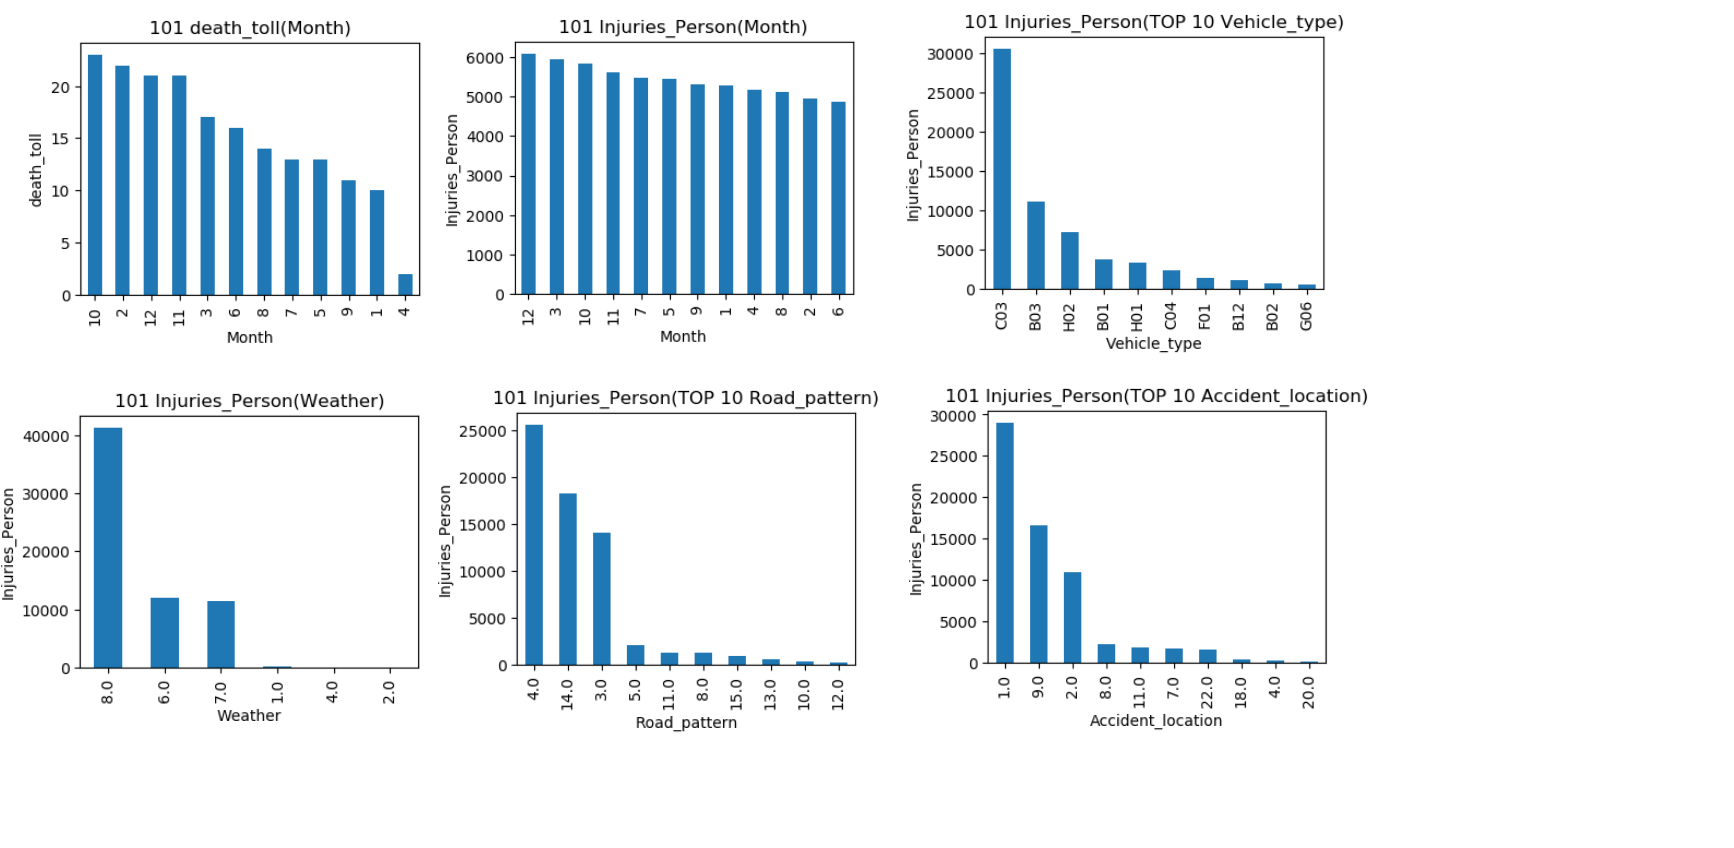
**<p><p> <font color=green size=2> Topic: top 10 Accident_location <font>** 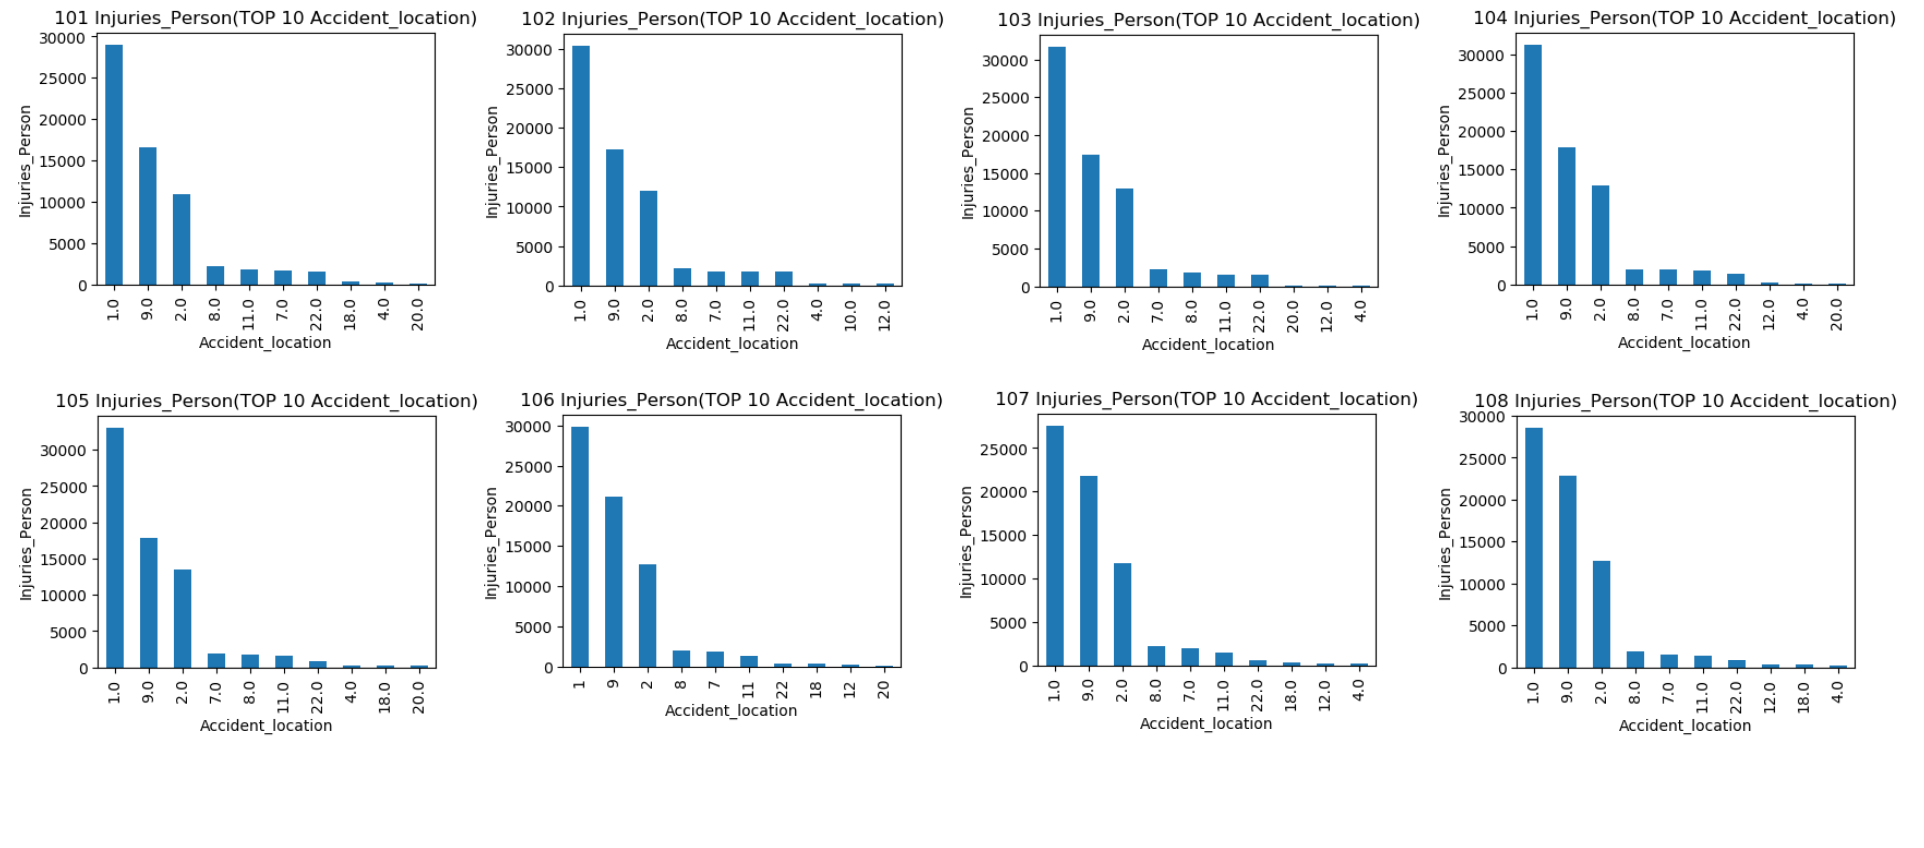

In [1]:
import pandas as pd
import glob

# combine the data
files = glob.glob('HW2_traffic_accident/[0-9][0-9][0-9]Traffic_accident.csv')
data = pd.concat([pd.read_csv(fp) for fp in files])
data

,Year,Month,Day,Hour,Minute,Processing_class,death_toll,Injuries_Person,Vehicle_type,Sex,Age,Weather,Speed_limit,Road_pattern,Accident_location
0,101,10,3,10,40,2,0,1,B03,1.0,30.0,8.0,0.0,4.0,2.0
1,101,10,3,10,40,2,0,1,C03,1.0,23.0,8.0,0.0,4.0,2.0
2,101,1,29,12,30,2,0,2,C03,1.0,73.0,8.0,50.0,4.0,1.0
3,101,1,29,12,30,2,0,2,C03,1.0,33.0,8.0,50.0,4.0,1.0
4,101,2,2,23,50,2,0,1,B03,1.0,20.0,7.0,50.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52428,108,12,22,17,31,2,0,1,H01,2.0,27.0,8.0,0.0,4.0,2.0
52429,108,12,22,17,31,2,0,1,H01,1.0,28.0,8.0,0.0,4.0,2.0
52430,108,12,22,17,31,2,0,1,B03,1.0,35.0,8.0,0.0,4.0,2.0
52431,108,12,26,7,20,2,0,1,C03,2.0,59.0,8.0,30.0,4.0,2.0


In [2]:
def plot_all():
#     use the x-axis to groupby the data
    month_death = data.groupby('Month', as_index=False).sum().sort_values(['death_toll'], ascending=False)
    month_injuries = data.groupby('Month', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False)
    top10_vehicle_type = data.groupby('Vehicle_type', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False).head(10)
    top_weather = data.groupby('Weather', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False)
    top10_road_pattern = data.groupby('Road_pattern', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False).head(10)
    top10_accident_location = data.groupby('Accident_location', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False).head(10)
    
    length = [12, 12, 10, 8, 10, 10]
    xlabel = ['Month', 'Month', 'Vehicle_type', 'Weather', 'Road_pattern', 'Accident_location']
    ylabel = ['death_toll', 'Injuries_Person', 'Injuries_Person', 'Injuries_Person', 'Injuries_Person', 'Injuries_Person']
    title = ['Number of traﬃc accident death toll per month in each year',
            'Number of traffic accident injuries per month in each year',
            'Number of traffic accident injuries per vehicle type in each year (take the top 10)',
            'Number of traffic accident injuries per weather in each year',
            'Number of traffic accident injuries per road pattern in each year (take the top 10)',
            'Number of traffic accident injuries per accident location in each year (take the top 10)']
    
    figure = plt.figure(figsize=(25, 25))
    plt.subplots_adjust(wspace =0, hspace =0.5)
#     subplot
    for i in range(0, 6):
        x = np.arange(length[i])
        ax = figure.add_subplot(6, 1, i+1)
        
        if xlabel[i] == 'Month':
            for j in range(8):
                if ylabel[i] == 'death_toll':
                    draw_all(j+101, ax, x-7*0.1/2+j*0.1, xlabel[i], ylabel[i], month_death['Month'].tolist())
                elif ylabel[i] == 'Injuries_Person':
                    draw_all(j+101, ax, x-7*0.1/2+j*0.1, xlabel[i], ylabel[i], month_injuries['Month'].tolist())
            ax.set_xticks(x)
            if ylabel[i] == 'death_toll':
                ax.set_xticklabels(month_death['Month'].tolist())
            elif ylabel[i] == 'Injuries_Person':
                ax.set_xticklabels(month_injuries['Month'].tolist())
            
        elif xlabel[i] == 'Vehicle_type':
            for j in range(8):
                draw_all(j+101, ax, x-7*0.1/2+j*0.1, xlabel[i], ylabel[i], top10_vehicle_type['Vehicle_type'].tolist())
            ax.set_xticks(x)
            ax.set_xticklabels(top10_vehicle_type['Vehicle_type'].tolist())
            
        elif xlabel[i] == 'Weather':
            for j in range(8):
                draw_all(j+101, ax, x-7*0.1/2+j*0.1, xlabel[i], ylabel[i], top_weather['Weather'].tolist())
            ax.set_xticks(x)
            ax.set_xticklabels(top_weather['Weather'].tolist())
            
        elif xlabel[i] == 'Road_pattern':
            for j in range(8):
                draw_all(j+101, ax, x-7*0.1/2+j*0.1, xlabel[i], ylabel[i], top10_road_pattern['Road_pattern'].tolist())
            ax.set_xticks(x)
            ax.set_xticklabels(top10_road_pattern['Road_pattern'].tolist())
            
        elif xlabel[i] == 'Accident_location':
            for j in range(8):
                draw_all(j+101, ax, x-7*0.1/2+j*0.1, xlabel[i], ylabel[i], top10_accident_location['Accident_location'].tolist())
            ax.set_xticks(x)
            ax.set_xticklabels(top10_accident_location['Accident_location'].tolist())
            
        plt.xlabel(xlabel[i], fontsize=20)
        plt.ylabel(ylabel[i], fontsize=20)
        plt.title(title[i], fontsize=25)
        plt.legend()

In [3]:
def draw_all(year, ax, width, xlabel, ylabel, df_list):
    category_deal = []
    if xlabel == 'Month':
        for i in range(1, 13):
            data_deal = data.loc[(data['Year']==year) & (data[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    elif xlabel == 'Vehicle_type':
        for i in range(1, 11):
            data_deal = data.loc[(data['Year']==year) & (data[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    elif xlabel == 'Weather':
        for i in range(1, 9):
            data_deal = data.loc[(data['Year']==year) & (data[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    elif xlabel == 'Road_pattern':
        for i in range(1, 11):
            data_deal = data.loc[(data['Year']==year) & (data[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    elif xlabel == 'Accident_location':
        for i in range(1, 11):
            data_deal = data.loc[(data['Year']==year) & (data[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    ax.bar(width, category_deal, width=0.1, label=str(year))
    for a,b in zip(width,category_deal):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)

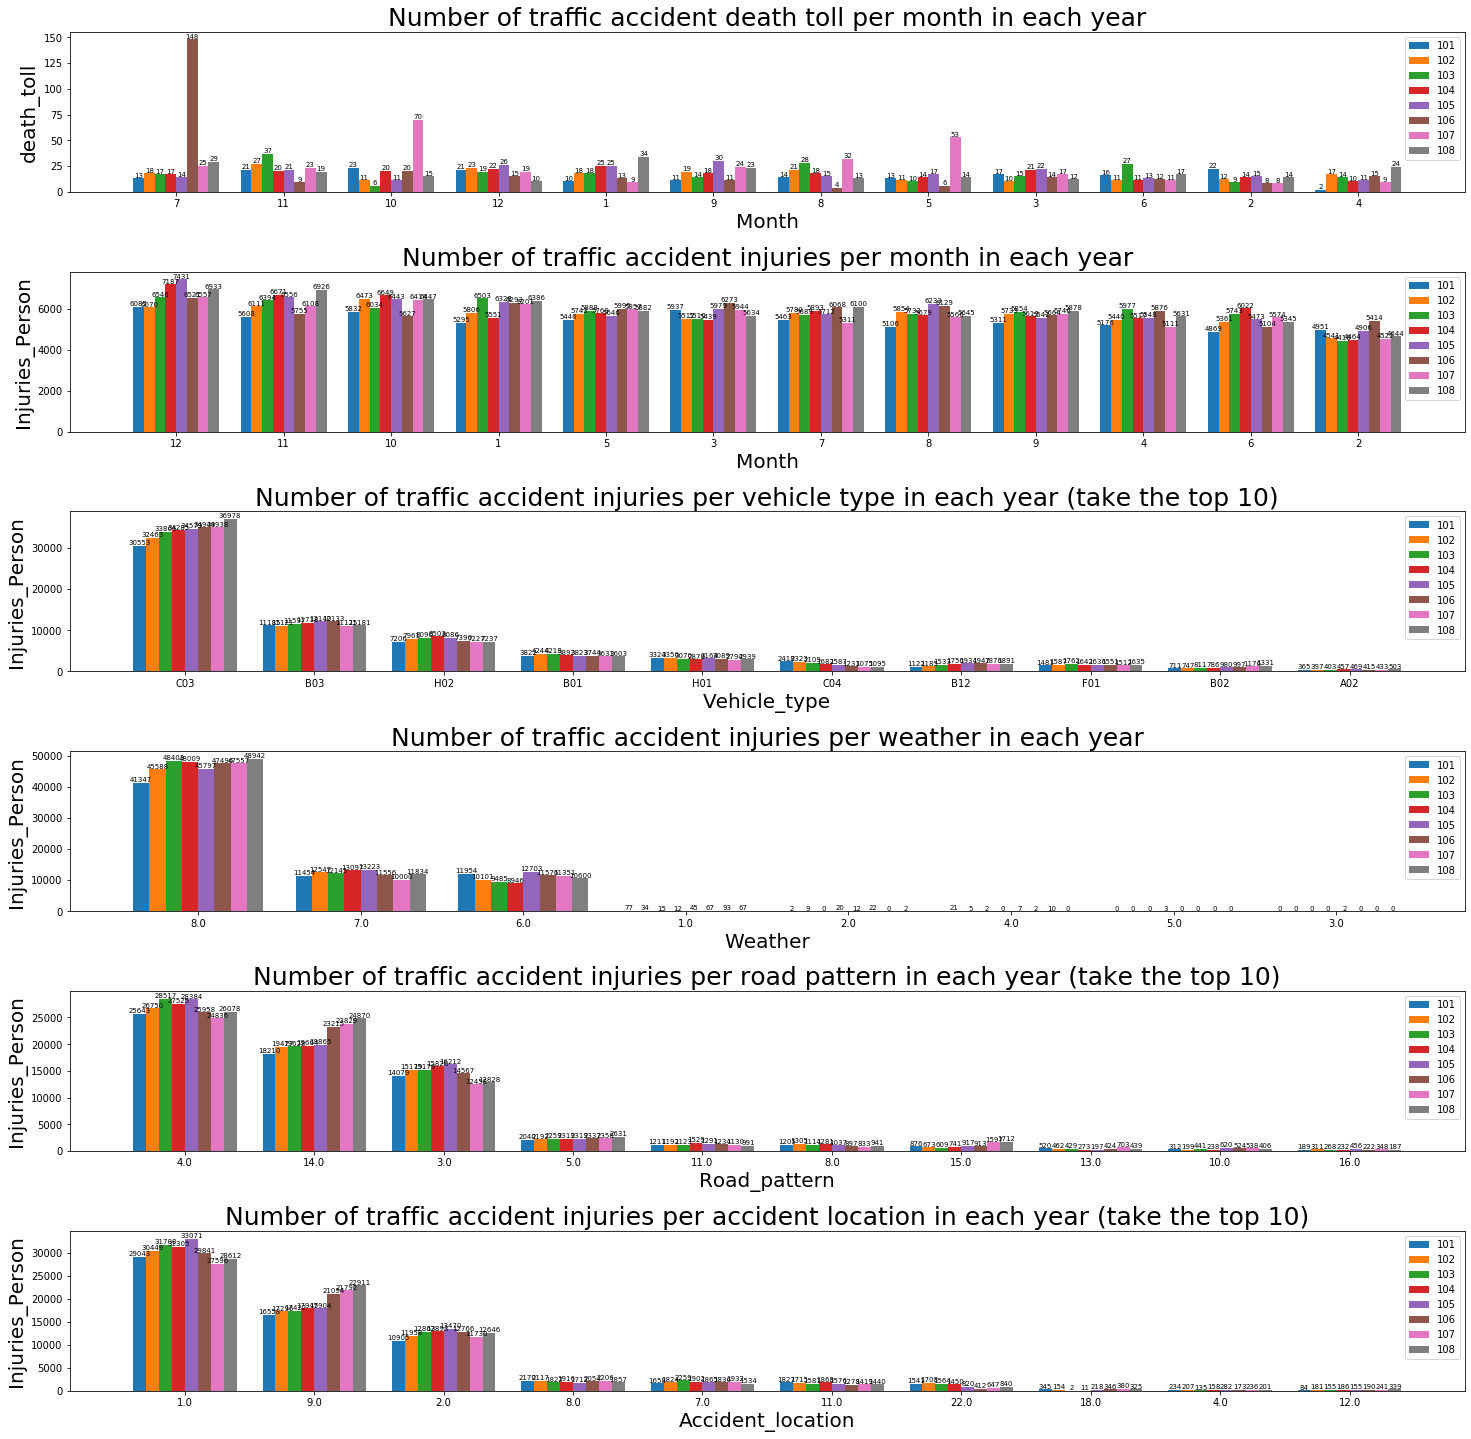

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

plot_all()
plt.show()

In [33]:
def plot(year):
    month_death = data[data['Year']==year].groupby('Month', as_index=False).sum().sort_values(['death_toll'], ascending=False)
    month_injuries = data[data['Year']==year].groupby('Month', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False)
    top10_vehicle_type = data[data['Year']==year].groupby('Vehicle_type', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False).head(10)
    top_weather = data[data['Year']==year].groupby('Weather', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False)
#     add the lack of data
    lack = []
    for i in range(1, 9):
        if i not in top_weather['Weather'].tolist():
            lack.append(i)
    for i in range(len(lack)):
        top_weather.loc[8-len(lack)+i] = [lack[i], year, 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 0, 'nan', 'nan', 'nan', 'nan', 'nan']
    top10_road_pattern = data[data['Year']==year].groupby('Road_pattern', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False).head(10)
    top10_accident_location = data[data['Year']==year].groupby('Accident_location', as_index=False).sum().sort_values(['Injuries_Person'], ascending=False).head(10)
    
    length = [12, 12, 10, 8, 10, 10]
    xlabel = ['Month', 'Month', 'Vehicle_type', 'Weather', 'Road_pattern', 'Accident_location']
    ylabel = ['death_toll', 'Injuries_Person', 'Injuries_Person', 'Injuries_Person', 'Injuries_Person', 'Injuries_Person']
    title = ['Number of traﬃc accident death toll per month in year ' + str(year),
            'Number of traffic accident injuries per month in year ' + str(year),
            'Number of traffic accident injuries per vehicle type in year ' + str(year) + ' (take the top 10)',
            'Number of traffic accident injuries per weather in year ' + str(year),
            'Number of traffic accident injuries per road pattern in year ' + str(year) + ' (take the top 10)',
            'Number of traffic accident injuries per accident location in year ' + str(year) + ' (take the top 10)']
    
    figure = plt.figure(figsize=(25, 25))
    plt.subplots_adjust(wspace =0, hspace =0.5)
    for i in range(0, 6):
        x = np.arange(length[i])
        ax = figure.add_subplot(6, 1, i+1)
        
        if xlabel[i] == 'Month':
            if ylabel[i] == 'death_toll':
                draw(year, ax, x, xlabel[i], ylabel[i], month_death, month_death['Month'].tolist())
            elif ylabel[i] == 'Injuries_Person':
                draw(year, ax, x, xlabel[i], ylabel[i], month_injuries, month_injuries['Month'].tolist())
            ax.set_xticks(x)
            if ylabel[i] == 'death_toll':
                ax.set_xticklabels(month_death['Month'].tolist())
                
            elif ylabel[i] == 'Injuries_Person':
                ax.set_xticklabels(month_injuries['Month'].tolist())
            
        elif xlabel[i] == 'Vehicle_type':
            draw(year, ax, x, xlabel[i], ylabel[i], top10_vehicle_type, top10_vehicle_type['Vehicle_type'].tolist())
            ax.set_xticks(x)
            ax.set_xticklabels(top10_vehicle_type['Vehicle_type'].tolist())
            
        elif xlabel[i] == 'Weather':
            draw(year, ax, x, xlabel[i], ylabel[i], top_weather, top_weather['Weather'].tolist())
            ax.set_xticks(x)
            ax.set_xticklabels(top_weather['Weather'].tolist())
            
        elif xlabel[i] == 'Road_pattern':
            draw(year, ax, x, xlabel[i], ylabel[i], top10_road_pattern, top10_road_pattern['Road_pattern'].tolist())
            ax.set_xticks(x)
            ax.set_xticklabels(top10_road_pattern['Road_pattern'].tolist())
            
        elif xlabel[i] == 'Accident_location':
            draw(year, ax, x, xlabel[i], ylabel[i], top10_accident_location, top10_accident_location['Accident_location'].tolist())
            ax.set_xticks(x)
            ax.set_xticklabels(top10_accident_location['Accident_location'].tolist())
            
        plt.xlabel(xlabel[i], fontsize=20)
        plt.ylabel(ylabel[i], fontsize=20)
        plt.title(title[i], fontsize=25)
        plt.legend()

In [37]:
def draw(year, ax, width, xlabel, ylabel, df, df_list):
    category_deal = []
    if xlabel == 'Month':
        for i in range(1, 13):
            data_deal = df.loc[(df[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    elif xlabel == 'Vehicle_type':
        for i in range(1, 11):
            data_deal = df.loc[(df[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    elif xlabel == 'Weather':
        for i in range(1, 9):
            data_deal = df.loc[(df[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    elif xlabel == 'Road_pattern':
        for i in range(1, 11):
            data_deal = df.loc[(df[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    elif xlabel == 'Accident_location':
        for i in range(1, 11):
            data_deal = df.loc[(df[xlabel]==df_list[i-1])]
            category_deal.append(data_deal[ylabel].sum())
    ax.bar(width, category_deal, width=0.5, label=str(year))
    for a,b in zip(width,category_deal):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)

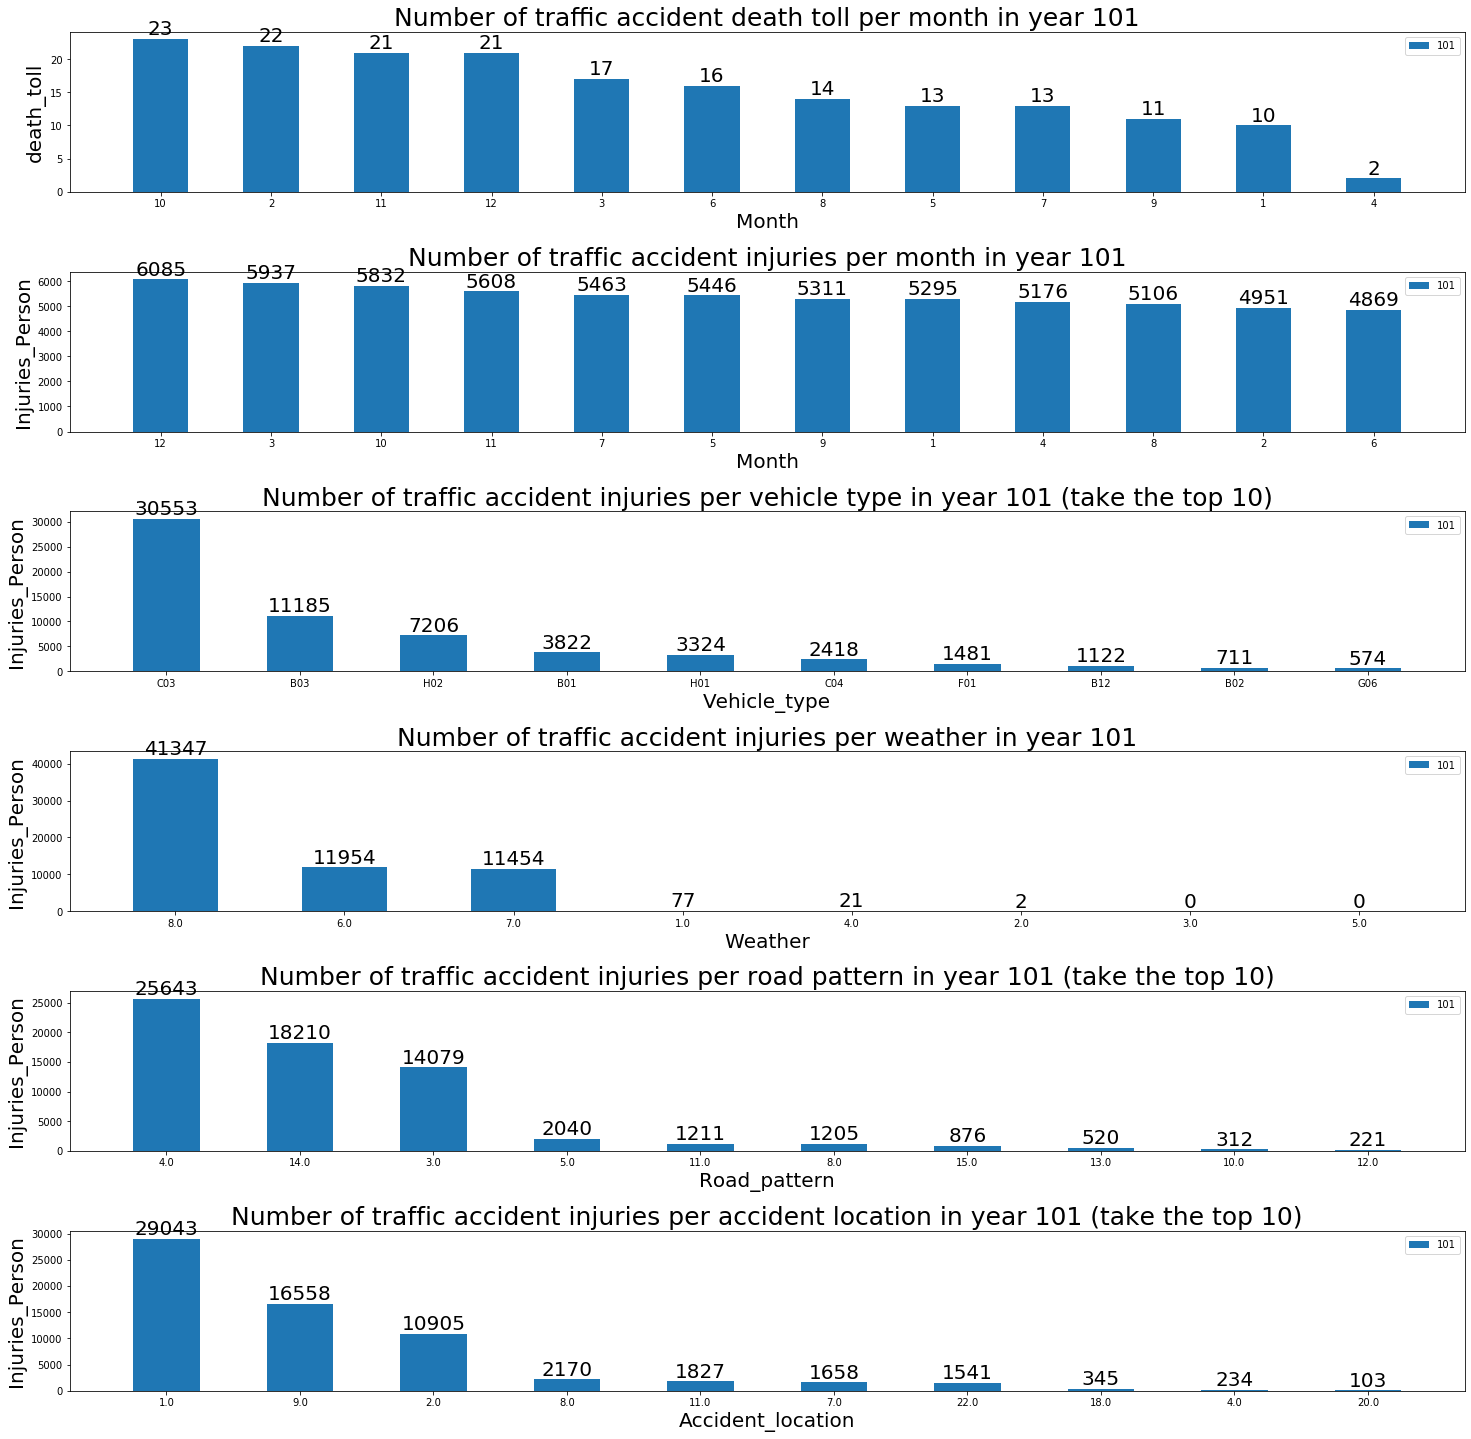

In [39]:
plot(101)
plt.show()

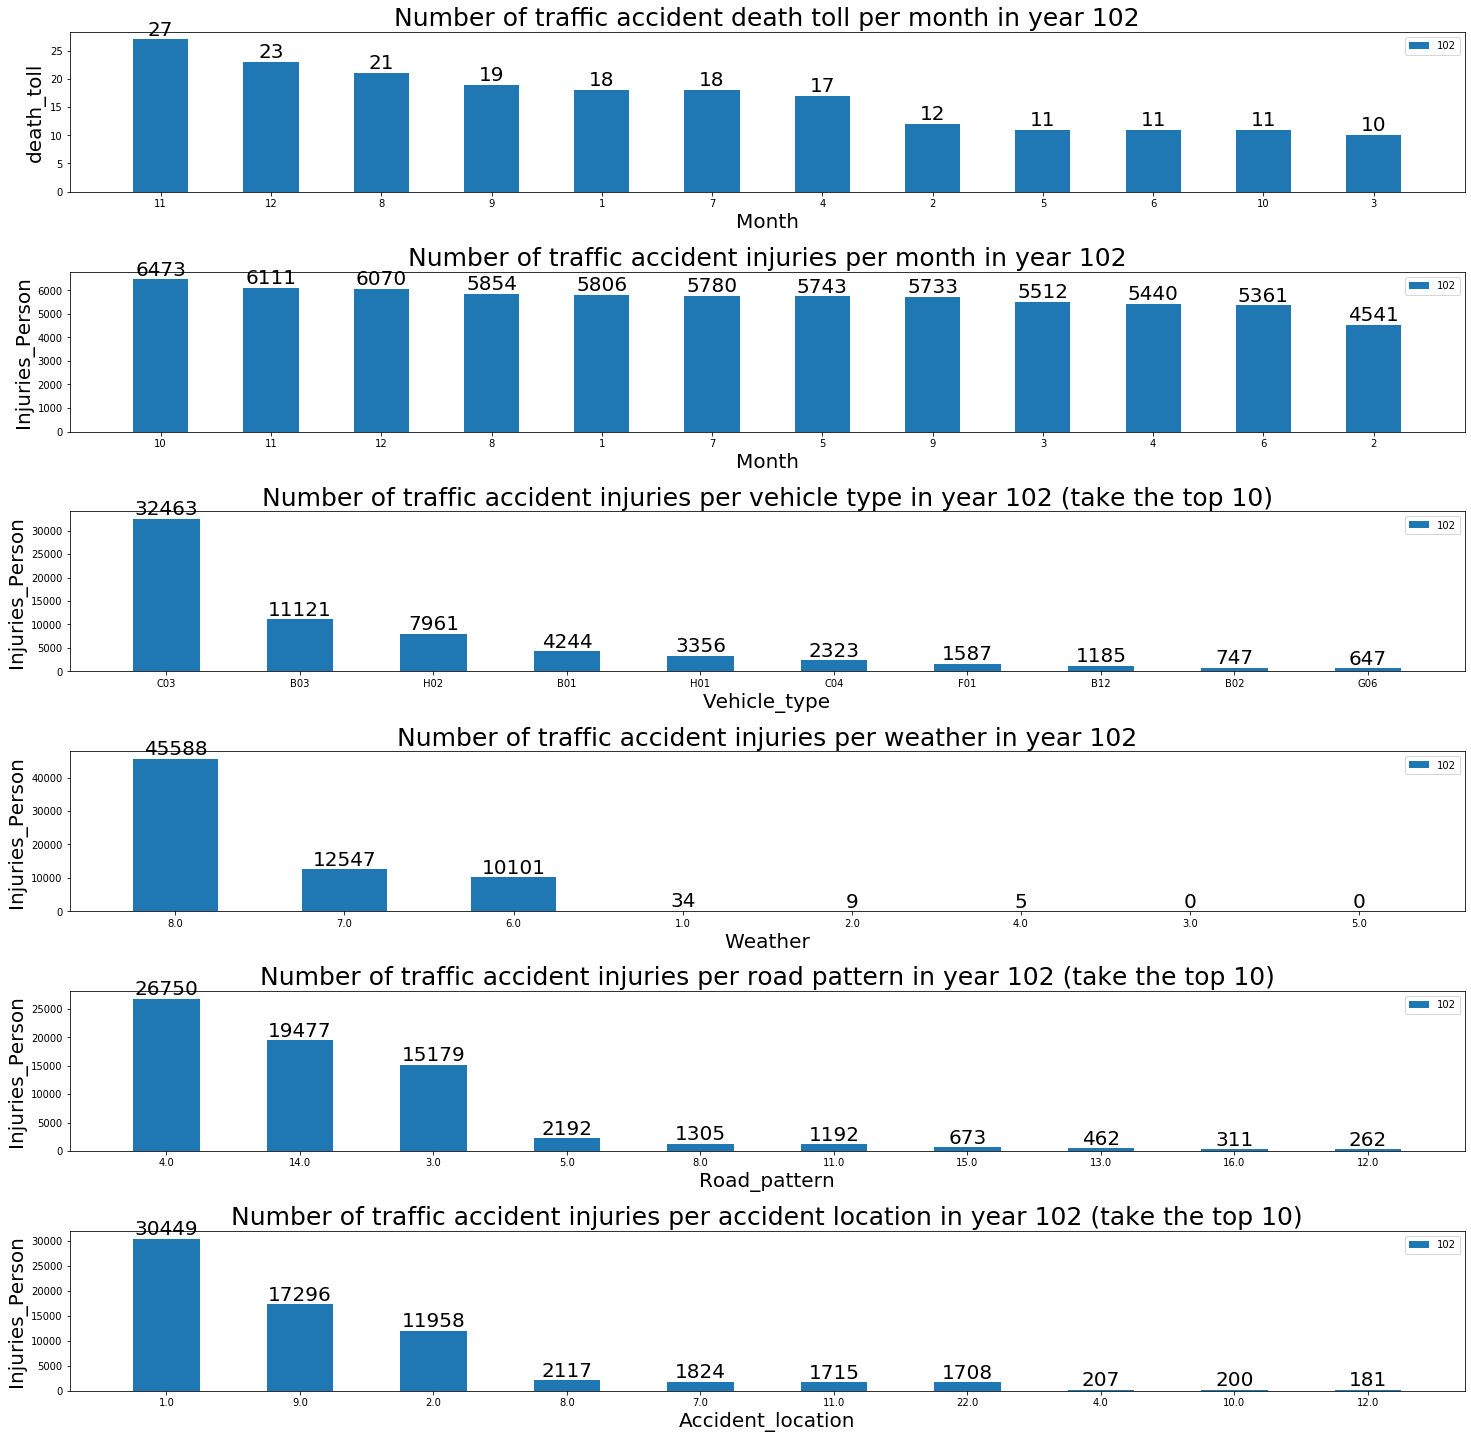

In [40]:
plot(102)
plt.show()

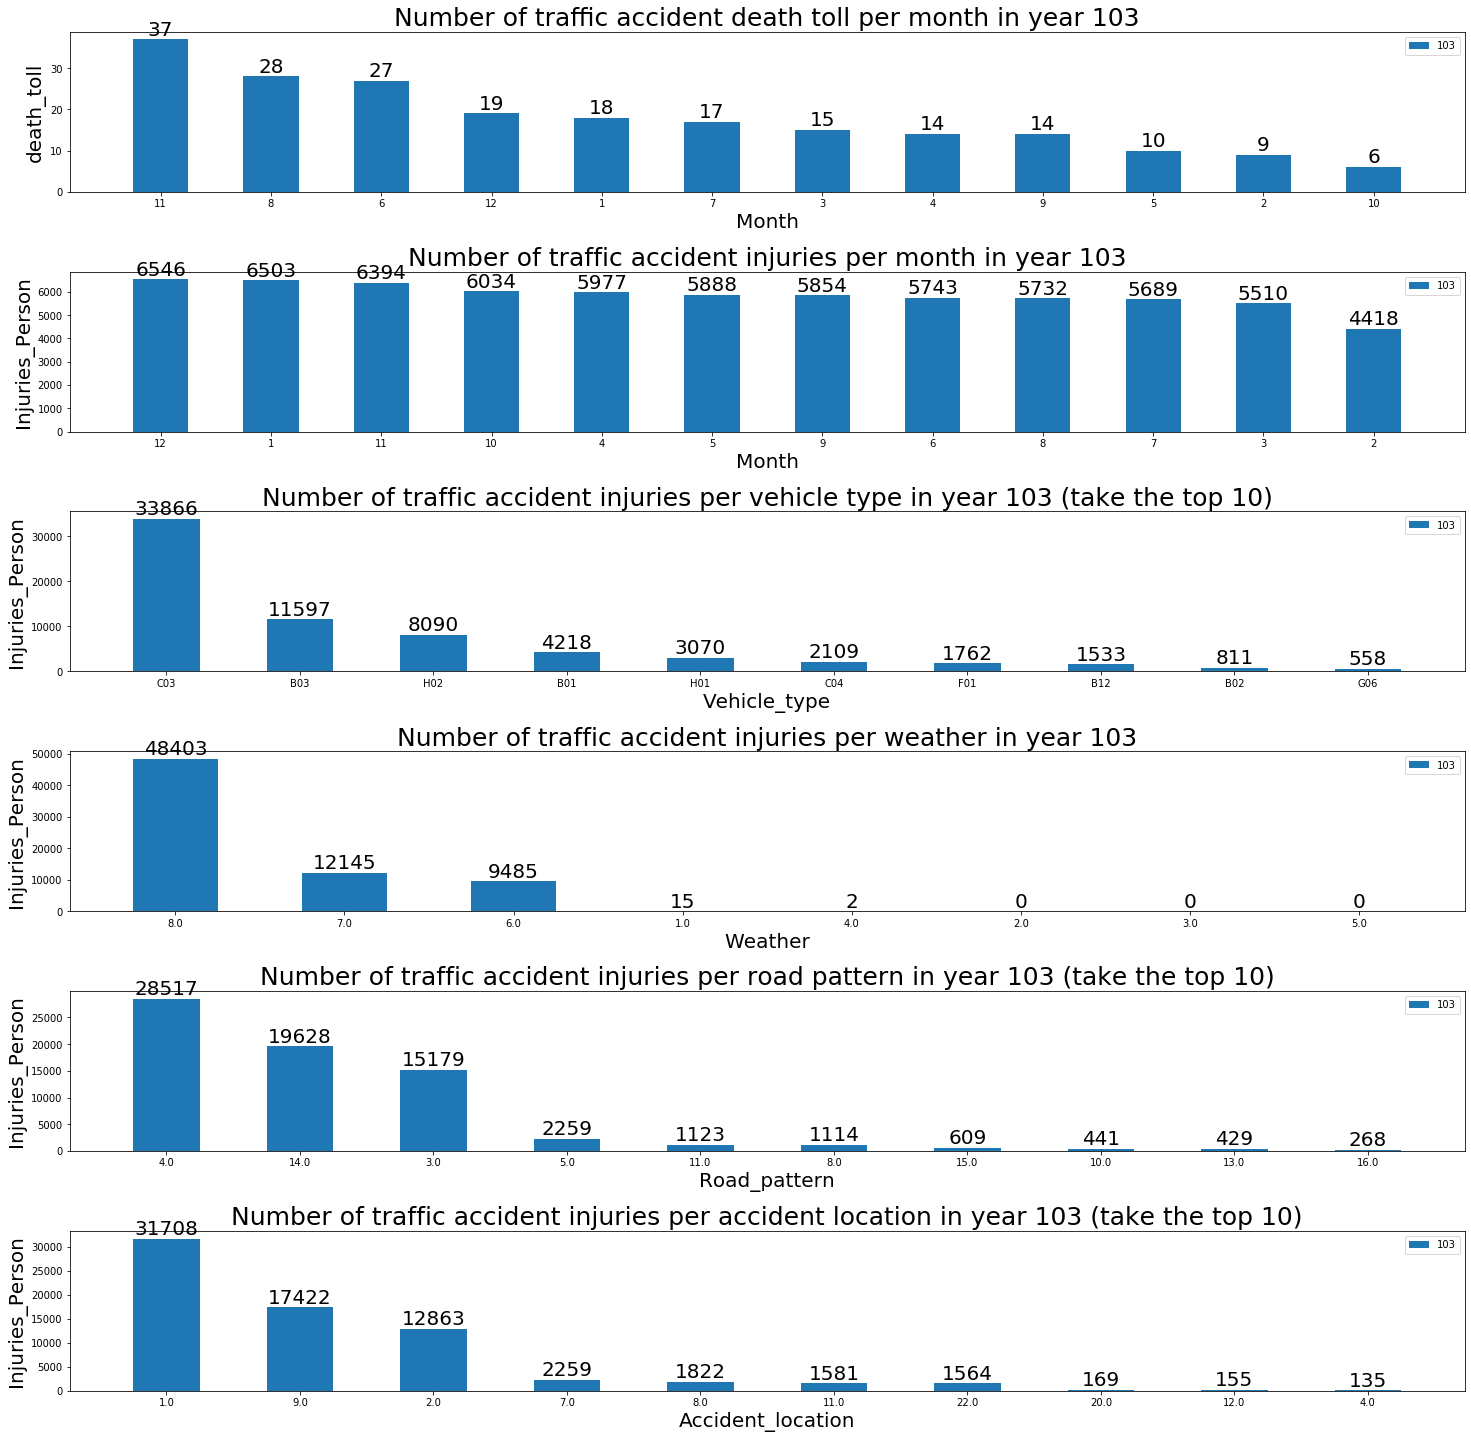

In [41]:
plot(103)
plt.show()

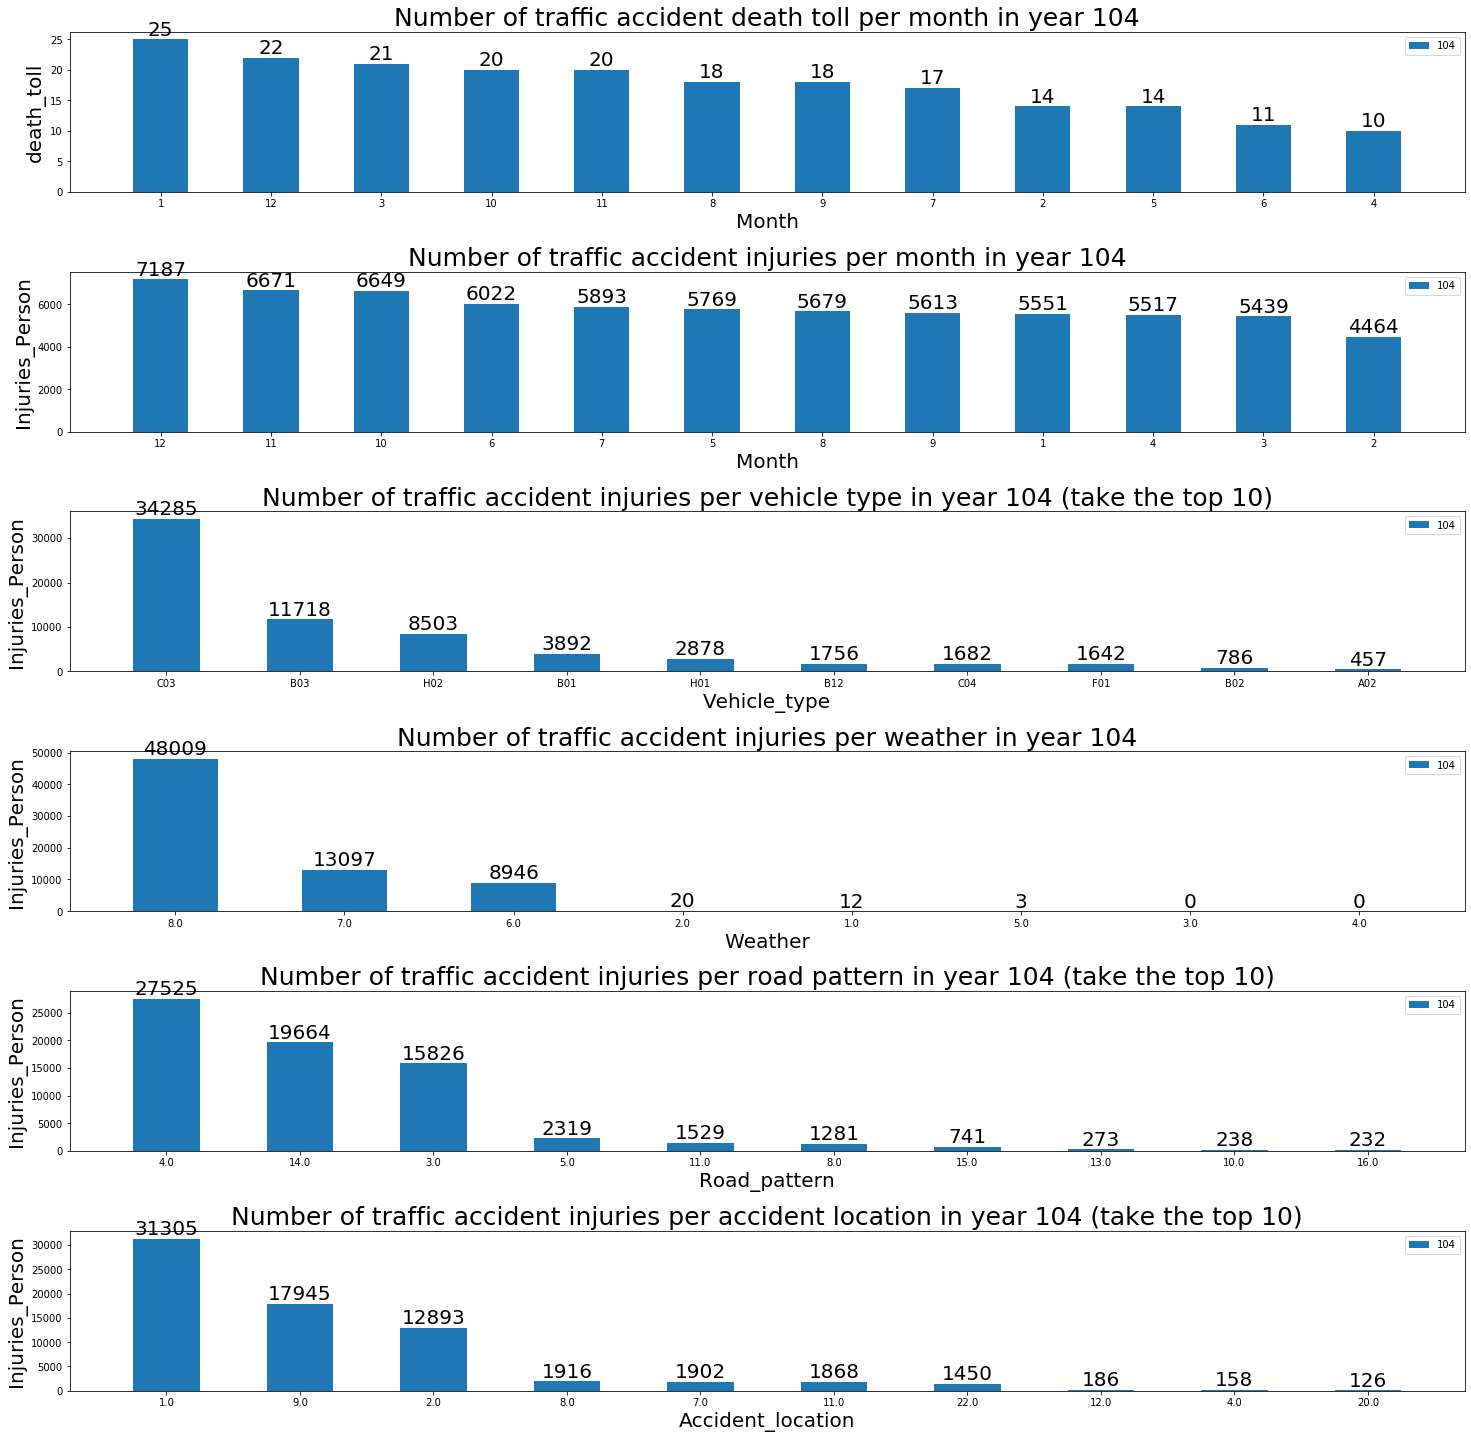

In [43]:
plot(104)
plt.show()

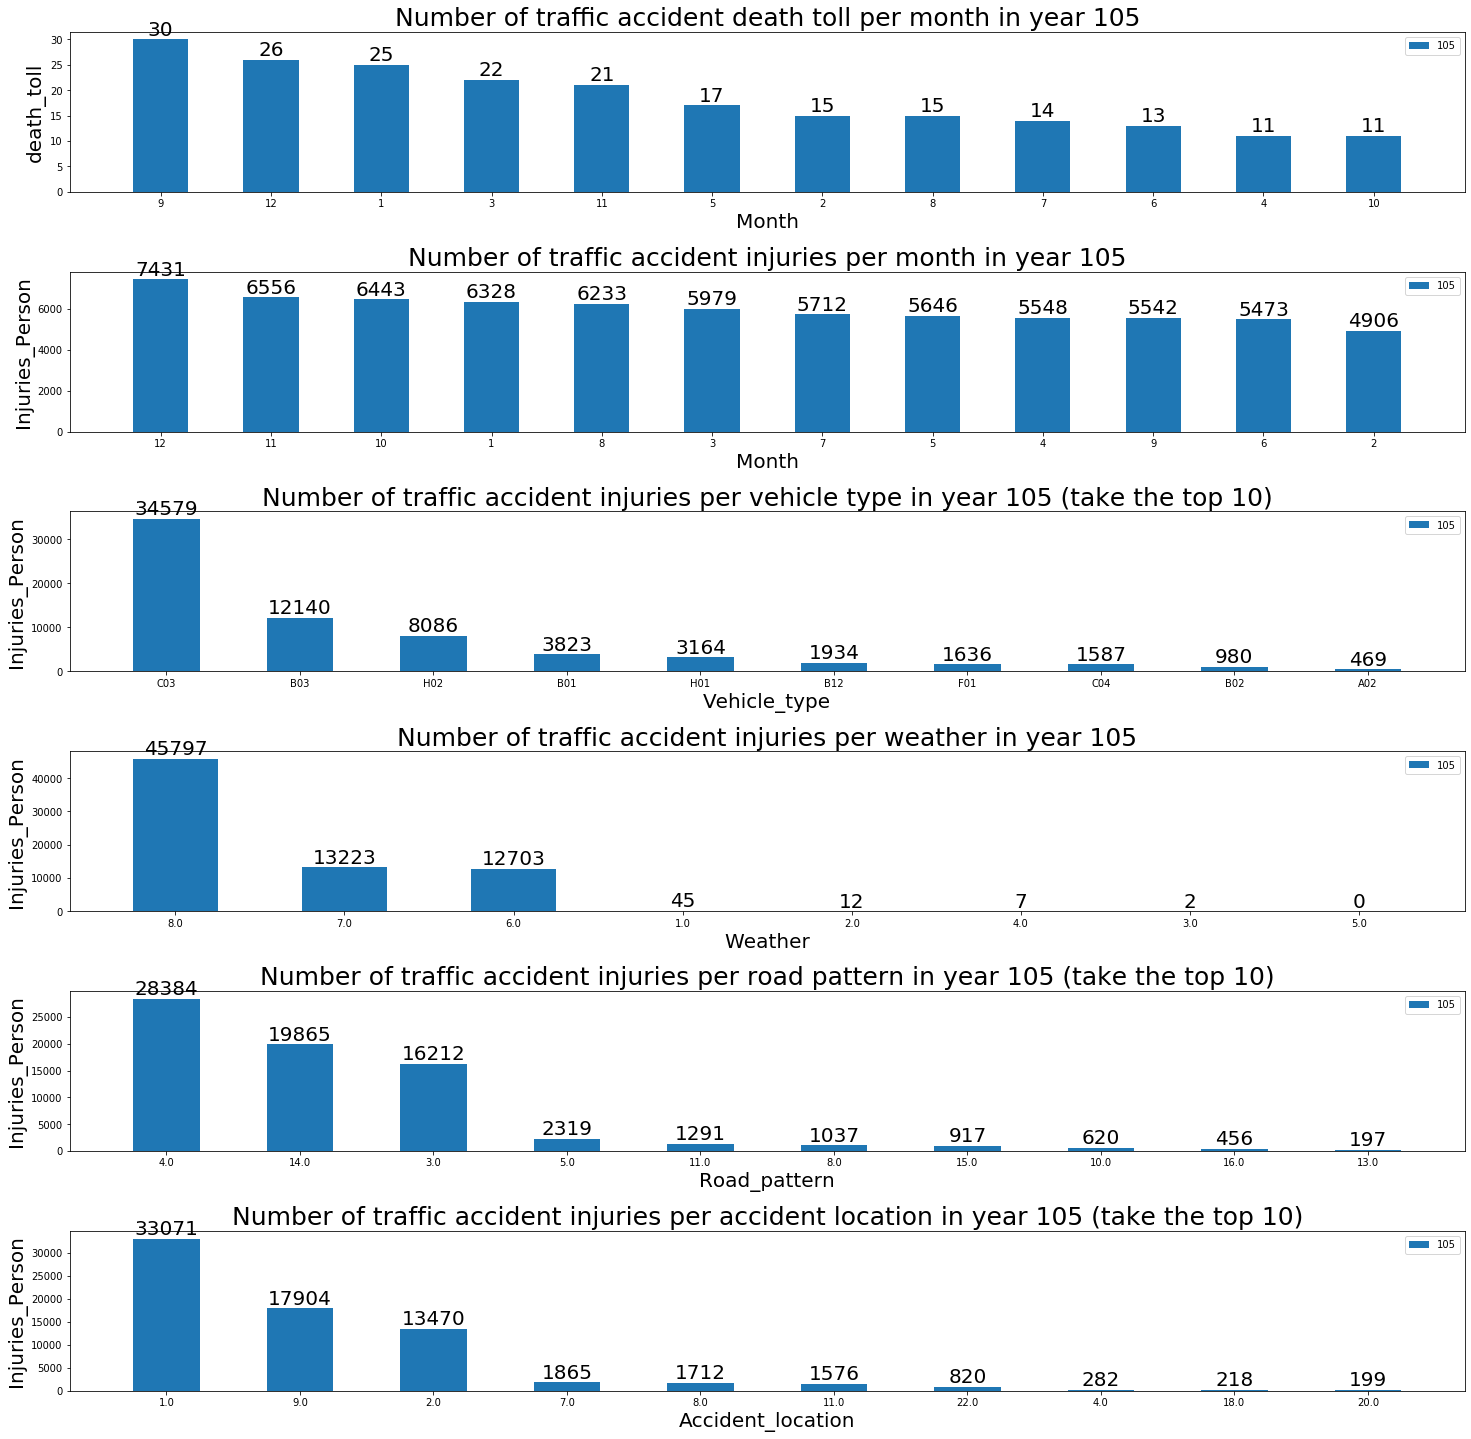

In [44]:
plot(105)
plt.show()

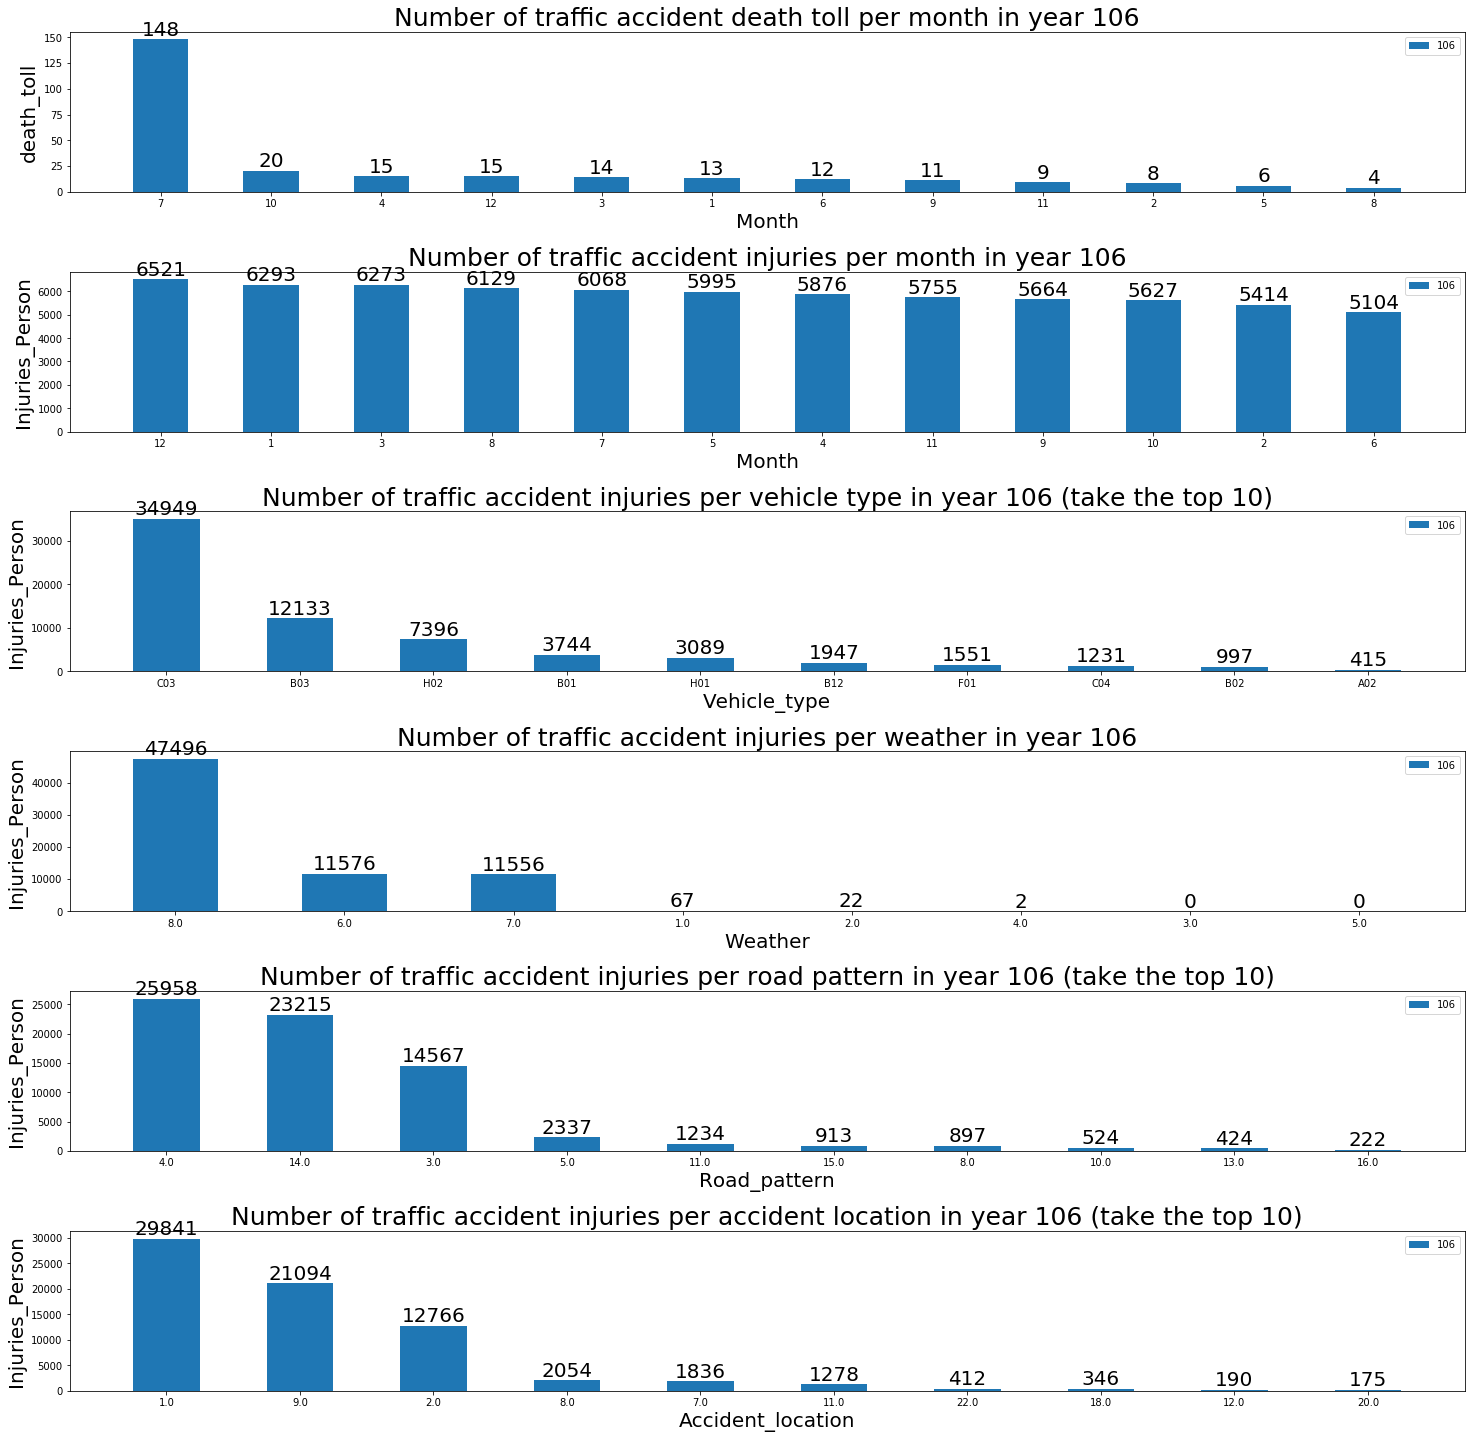

In [45]:
plot(106)
plt.show()

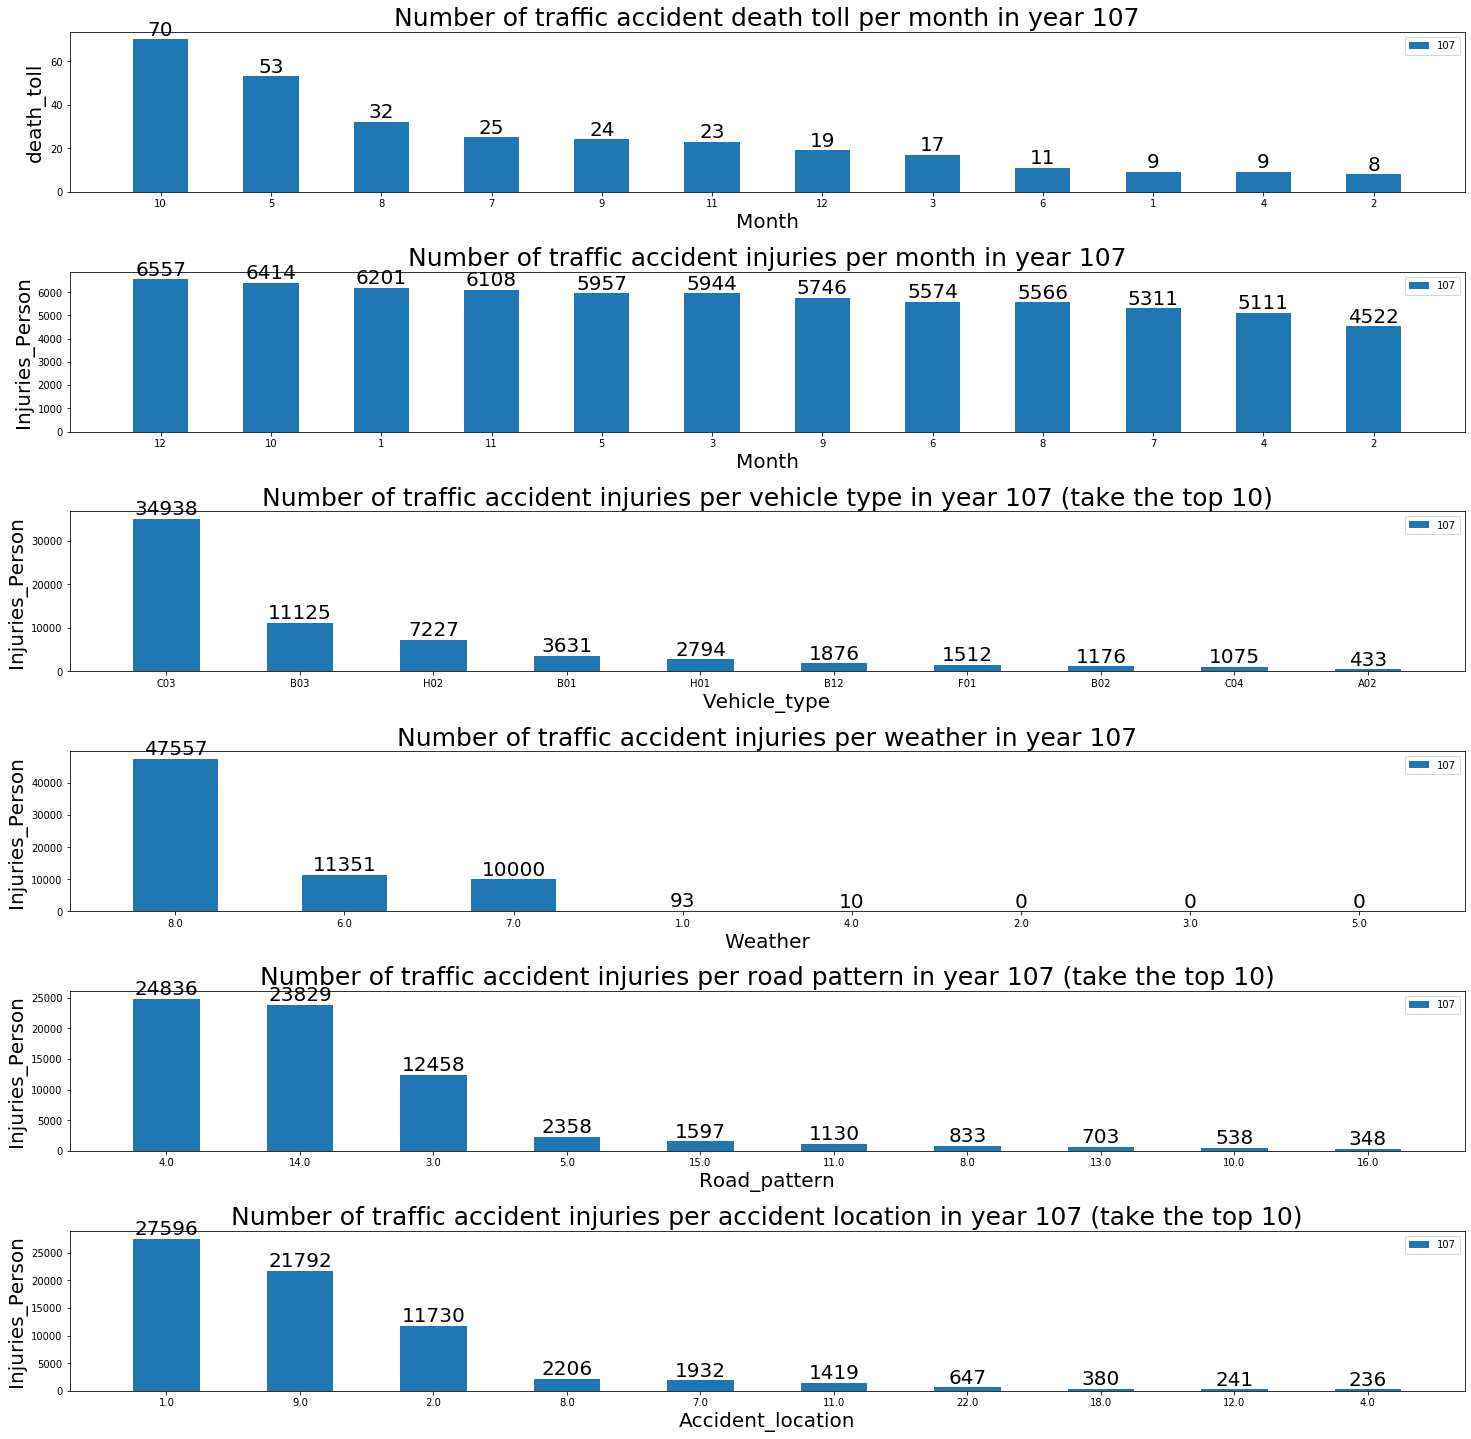

In [46]:
plot(107)
plt.show()

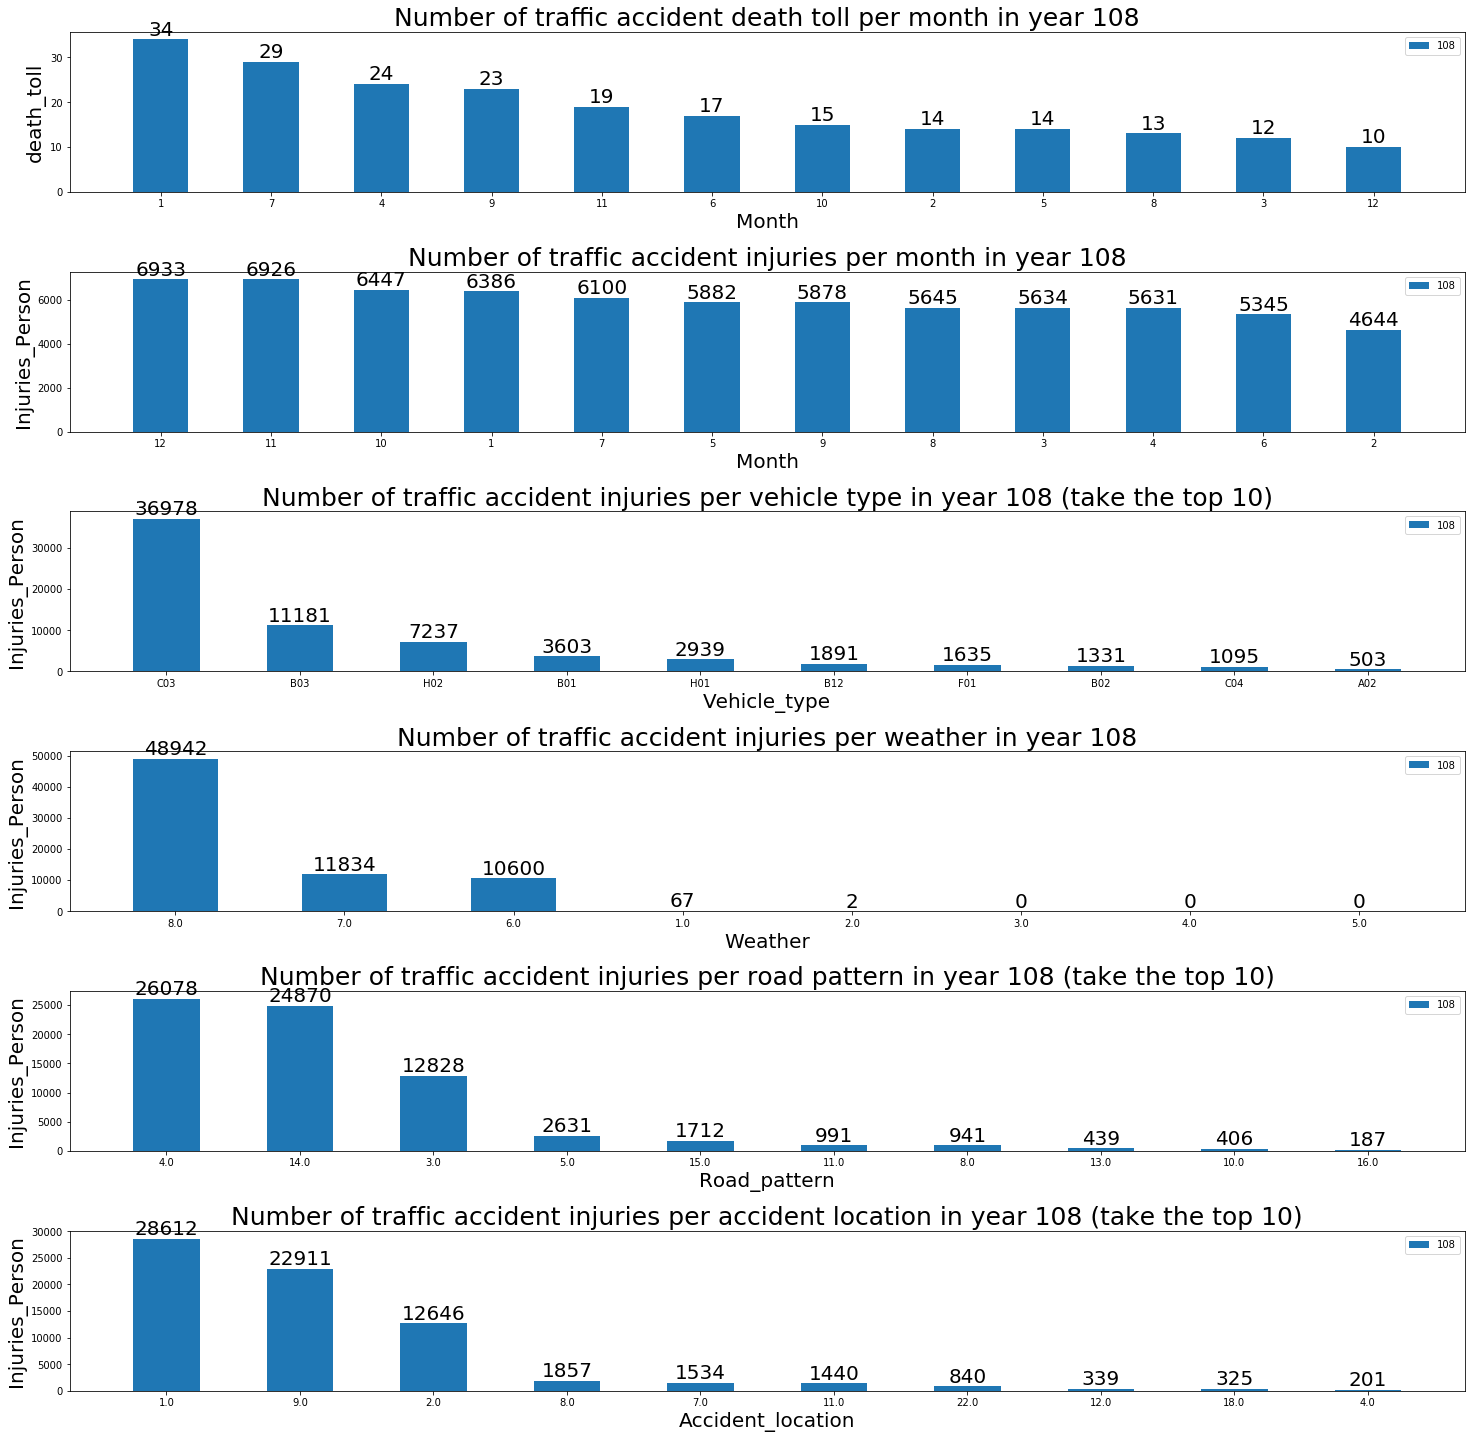

In [47]:
plot(108)
plt.show()